<a href="https://colab.research.google.com/github/almsalahuddin/Data-Processing-and-Visualization/blob/main/Quiz_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz 29 # : CPSMA 4313 [Dr. Jacob's](https://github.com/nurfnick) Data processing visualization

## Uncertainty

### A L M SALAHUDDIN

##1. Explain the difference between standard error and confidence intervals.

The standard error is the sampling error describing the average sample (for example, ten samples, the standard deviation of the average score of his score (7,8,6,9,5,6,7,7,8,9), that is, the standard deviation of the sampling distribution) and A standard error is the standard deviation divided by the square root of the sample size. The standard errors of the sample are:

$$
SE = \frac{s(samples-standard-deviation)}{\sqrt{n}}
$$

On the other hand, the confidence interval shows that the true value of overall parameter has a certain probability of falling in a corresponding interval related to the measurement result. The confidence interval gives the degree of credibility of the true value of the total parameter in the interval of the measured value, which is called the confidence level. The higher the confidence level, the larger the corresponding confidence interval.


##2. Use the workout data and graph the average calories by workout type and include the 95% confidence interval.

In [ ]:
import pandas as pa

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Activity_Dataset_V1.csv')
df.head()

,Unnamed: 0,activity_day,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,...,max_pace,min_pace,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
0,0,2022-01-01,Freestyle,9.30,77,123,NaN,18.88,168.54,138.30,...,NaN,NaN,112.5,122.0,103,19,28,2,7,50
1,1,2022-01-01,Freestyle,3.44,96,55,NaN,29.65,125.92,292.81,...,NaN,NaN,111.0,122.0,100,42,28,2,29,88
2,2,2022-01-01,Indoor Cycling,6.34,85,33,NaN,17.85,81.93,323.69,...,NaN,NaN,95.0,90.0,100,1,32,0,22,43
3,3,2022-01-01,Walking,7.91,42,82,1571.0,22.10,29.63,180.16,...,28:58,07:58,83.0,85.0,81,3,22,0,24,65
4,4,2022-01-01,Open Water,8.99,36,131,NaN,25.83,64.55,342.89,...,NaN,NaN,138.0,166.0,110,7,0,5,21,88


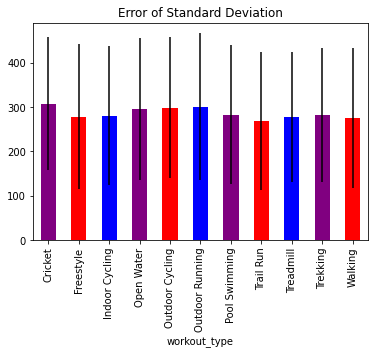

In [ ]:
dfgrouped = df.groupby('workout_type').agg(['mean','std', 'count'])

dfgrouped.calories.plot.bar(y = 'mean',yerr = 'std', legend = False, color = ['purple','red', 'blue'], title = "Error of Standard Deviation")

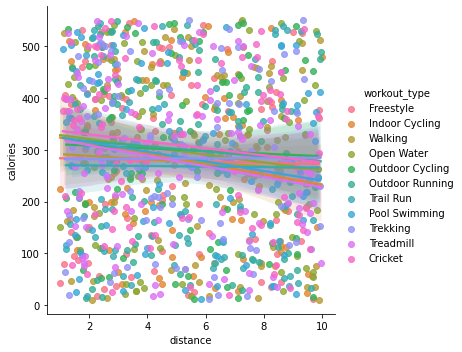

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.lmplot(data = df, 
            x = 'distance', 
            y = 'calories',
            hue = 'workout_type')

plt.show()

In [ ]:
pa.crosstab(df.workout_type, df.calories)

calories,10,11,12,13,14,15,17,18,19,20,...,540,541,542,543,544,545,547,548,549,550
workout_type,,,,,,,,,,,,,,,,,,,,,
Cricket,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
Freestyle,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,1,0,0,0
Indoor Cycling,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Open Water,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
Outdoor Cycling,0,0,1,0,1,1,0,0,0,0,...,1,0,1,1,1,1,0,0,0,0
Outdoor Running,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
Pool Swimming,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trail Run,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0
Treadmill,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
import numpy as np
from scipy.stats import norm

In [ ]:
norm.ppf(0.975) #95% of confidence level

1.959963984540054

In [ ]:
norm.ppf(0.995) #99% of confidence level

2.5758293035489004

In [ ]:
norm.ppf(0.95) #90% of confidence level

1.6448536269514722

In [ ]:
n=len(df)
conf_level= .95
alpha = 1. - conf_level

In [ ]:
x_bar=df['calories'].mean()
x_bar

286.31

In [ ]:
sigma=df['calories'].std()
sigma

156.27851059206094

In [ ]:
z_critical=stats.norm.ppf(q=0.975)
z_critical

1.959963984540054

In [ ]:
z_interval=stats.norm.interval(alpha=conf_level)
z_interval

(-1.959963984540054, 1.959963984540054)

In [ ]:
import math
standard_error=sigma/math.sqrt(n)
standard_error

4.941960428096618

In [ ]:
CI_lower=x_bar - z_critical * standard_error
CI_upper=x_bar + z_critical * standard_error

In [ ]:
CI_lower, CI_upper

(276.6239355479085, 295.9960644520915)

Above, we have the confidence interval of the the average calories.

I have tried my best to find the right confidence interval and hopefully I got it right!